<a href="https://colab.research.google.com/github/roshni2001/ML-Project/blob/main/FinalML_LoanApprovals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Load the Dataset

In [80]:
data=pd.read_csv("/content/loan_approval_dataset.csv")

#Preprocessing and Data Inspection

**CHECK FOR MISSING VALUES**

In [81]:
# Check for null values
print(data.isnull().sum())

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


**DATASET SIZE**

In [82]:
data.shape

(4269, 13)

**Analyzing both numeric and object series and also the DataFrame column sets of mixed data type**

In [83]:
# Display dataset statistics
print(data.describe())

           loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000000    453.000000               2.20000

**Remove leading spaces from column names**

In [84]:

data.columns = data.columns.str.lstrip()

**FEATURE ENGINEERING**

In [85]:
# creating income-to-loan ratio
data['income_to_loan_ratio']= data['income_annum']/ data['loan_amount']
# creating total asset value i.e which is the sum of
# residential assets, commercial assets, luxury assets and bank assets
data['total_asset_value'] = data['residential_assets_value']+ data['commercial_assets_value'] + data['luxury_assets_value'] + data['bank_asset_value']
# creating LTV_ratio (Loan_to_value Ratio)
# A lower LTV ratio indicates thatthe borrower has
# a larger down payment, reducing the lender's risk.
# data['LTV_ratio%']= data['loan_amount']/ data['total_asset_value'] * 100

In [86]:
data.shape

(4269, 15)

In [87]:
data.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,income_to_loan_ratio,total_asset_value
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,0.321070,50700000
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,0.336066,17000000
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,0.306397,57700000
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,0.267101,52700000
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,0.404959,55000000


**Display unique values in categorical columns**

In [88]:

categorical_cols = ['education', 'self_employed', 'loan_status']
for col in categorical_cols:
    print(f"Unique values in {col}: {data[col].unique()}")

Unique values in education: [' Graduate' ' Not Graduate']
Unique values in self_employed: [' No' ' Yes']
Unique values in loan_status: [' Approved' ' Rejected']


**LABEL ENCONDING**

In [89]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
data['education'] = label_encoder.fit_transform(data['education'])  # Graduate=0, Not Graduate=1
data['self_employed'] = label_encoder.fit_transform(data['self_employed'])  # No=0, Yes=1
data['loan_status'] = label_encoder.fit_transform(data['loan_status'])  # Approved=1, Rejected=0

data.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,income_to_loan_ratio,total_asset_value
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0.321070,50700000
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,0.336066,17000000
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,0.306397,57700000
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,0.267101,52700000
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,0.404959,55000000


**Checking Correlation using Heatmap**

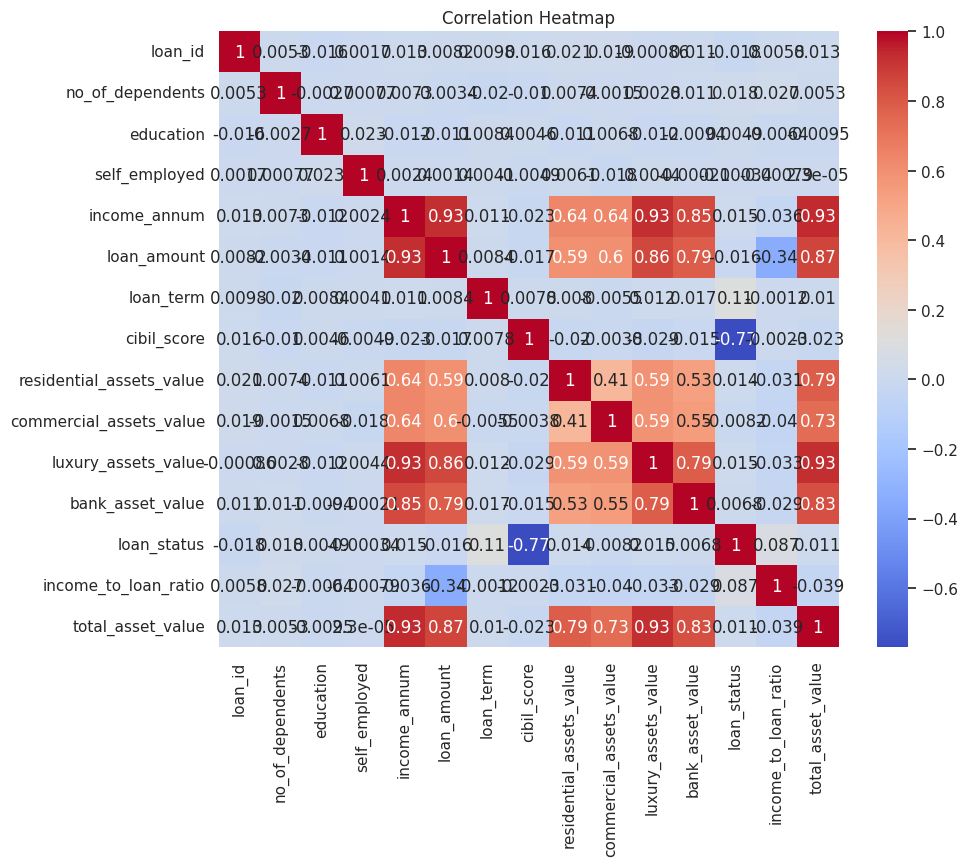

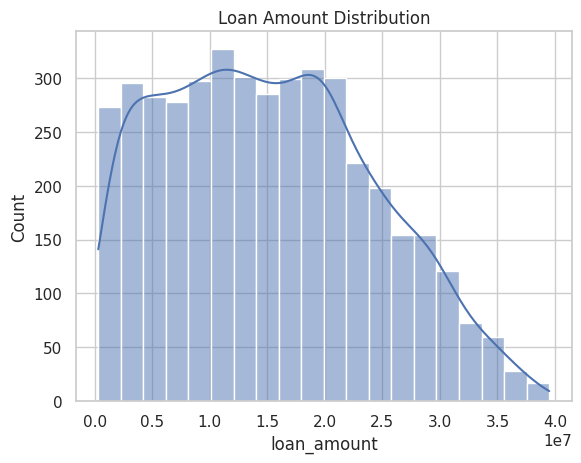

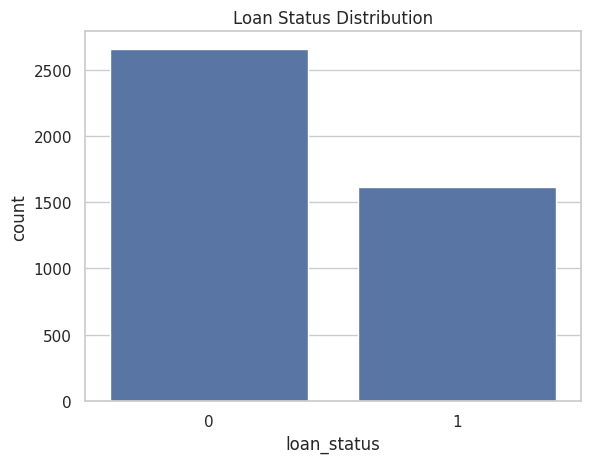

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Distribution of Loan Amount
sns.histplot(data['loan_amount'], kde=True, bins=20)
plt.title("Loan Amount Distribution")
plt.show()

# Categorical distribution for loan status
sns.countplot(x='loan_status', data=data)
plt.title("Loan Status Distribution")
plt.show()


**Outlier Detection**

In [91]:
numerical_cols = ['income_annum','cibil_score', 'loan_amount','residential_assets_value' ,'commercial_assets_value','luxury_assets_value','bank_asset_value','total_asset_value','income_to_loan_ratio']


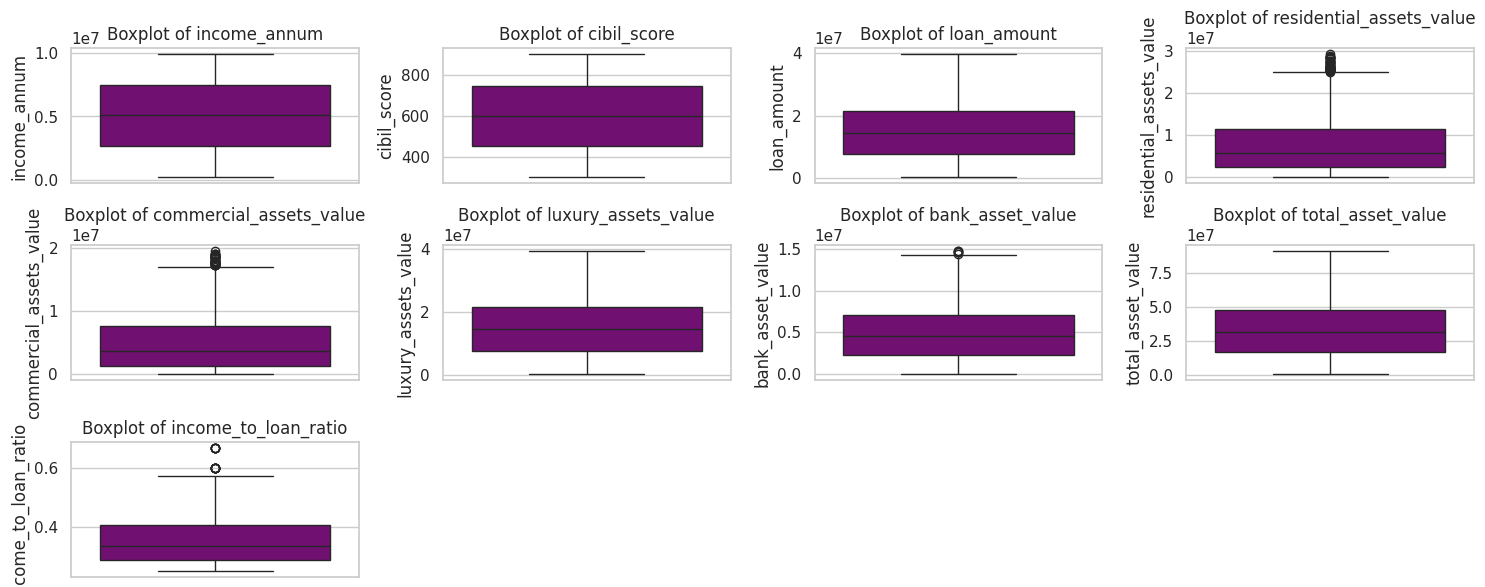

In [92]:
import seaborn as sns
def plot_boxplots(df, columns):
    plt.figure(figsize=(15, 8))
    num_plots = len(columns)  # Calculate the number of plots needed
    num_rows = 4  # Number of rows in the subplot grid
    num_cols = 4  # Number of columns in the subplot grid
    for i, col in enumerate(columns):
        # Calculate the subplot index based on the number of rows and columns
        subplot_index = i + 1
        plt.subplot(num_rows, num_cols, subplot_index)  # Correct usage of subplot
        sns.boxplot(y=df[col], color='purple')
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

plot_boxplots(data, numerical_cols)

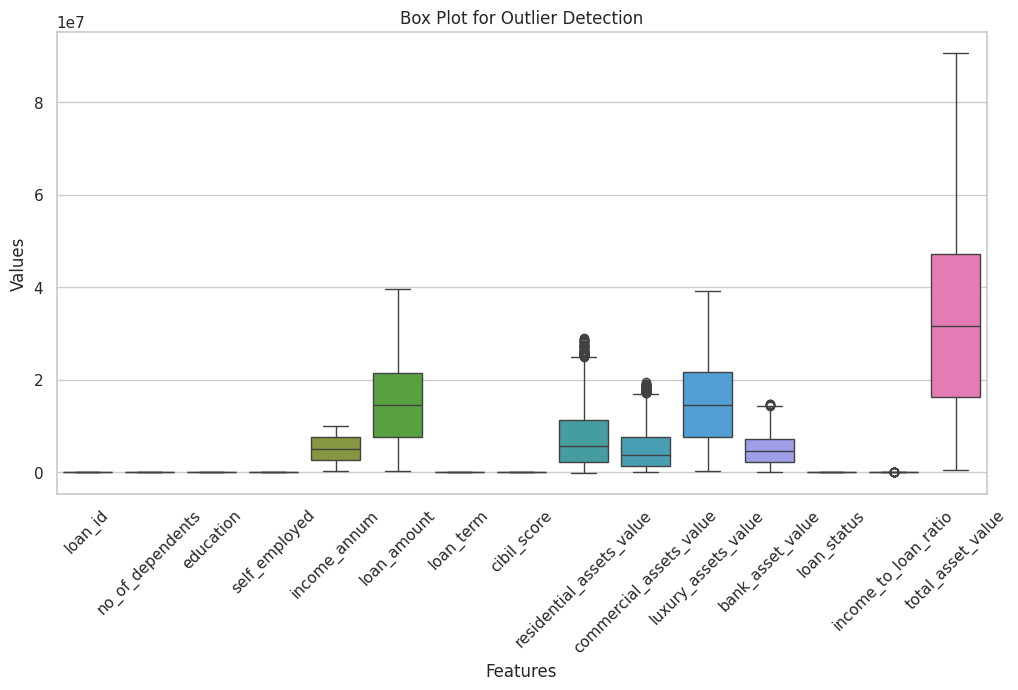

In [93]:
import matplotlib.pyplot as plt
numerical_cols = ['income_annum','cibil_score', 'loan_amount','residential_assets_value' ,'commercial_assets_value','luxury_assets_value','bank_asset_value','total_asset_value','income_to_loan_ratio']
# Create a boxplot
# sns.boxplot(data=numerical_cols)

# # Display the plot
# plt.show()
# Set the aesthetics for the plots

sns.set(style="whitegrid")

# Create a box plot for each numerical column in the dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title('Box Plot for Outlier Detection')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


**Removing Outliers using IQR**

In [94]:
# Define numerical columns
numerical_cols = ['income_annum','cibil_score', 'loan_amount','residential_assets_value' ,'commercial_assets_value','luxury_assets_value','bank_asset_value','total_asset_value','income_to_loan_ratio']
# IQR calculation
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
outliers = (data[numerical_cols] < (Q1 - 1.5 * IQR)) | (data[numerical_cols] > (Q3 + 1.5 * IQR))
data_cleaned = data[~outliers.any(axis=1)]

print(f"Data shape after outlier removal: {data_cleaned.shape}")


Data shape after outlier removal: (4163, 15)


**Visulazing after oulier Removal**

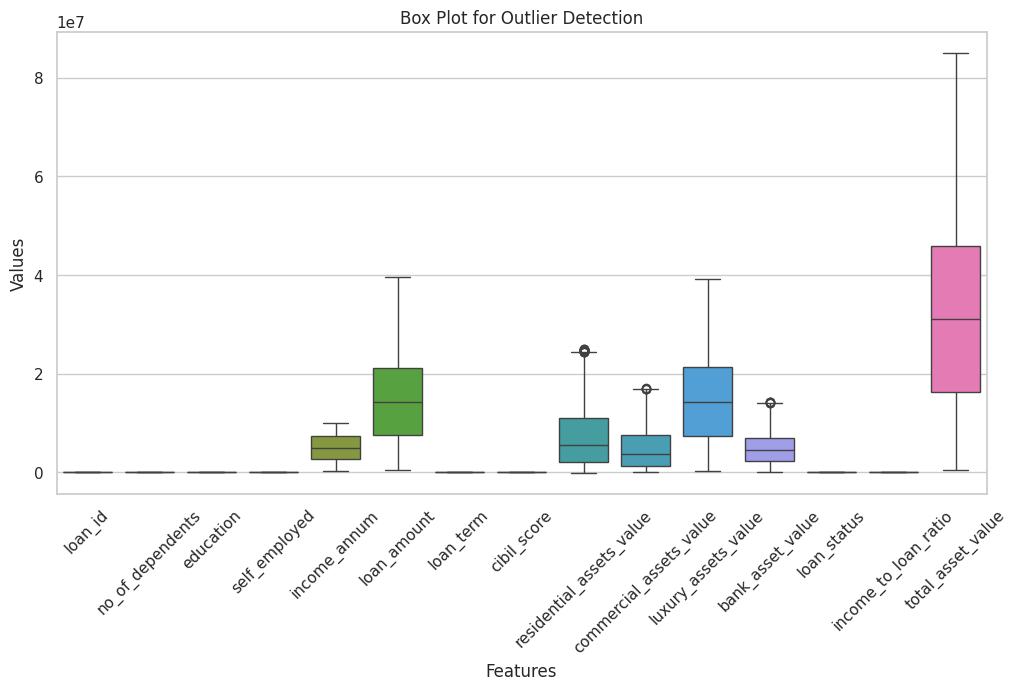

In [95]:
sns.set(style="whitegrid")

# Create a box plot for each numerical column in the dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_cleaned)
plt.title('Box Plot for Outlier Detection')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


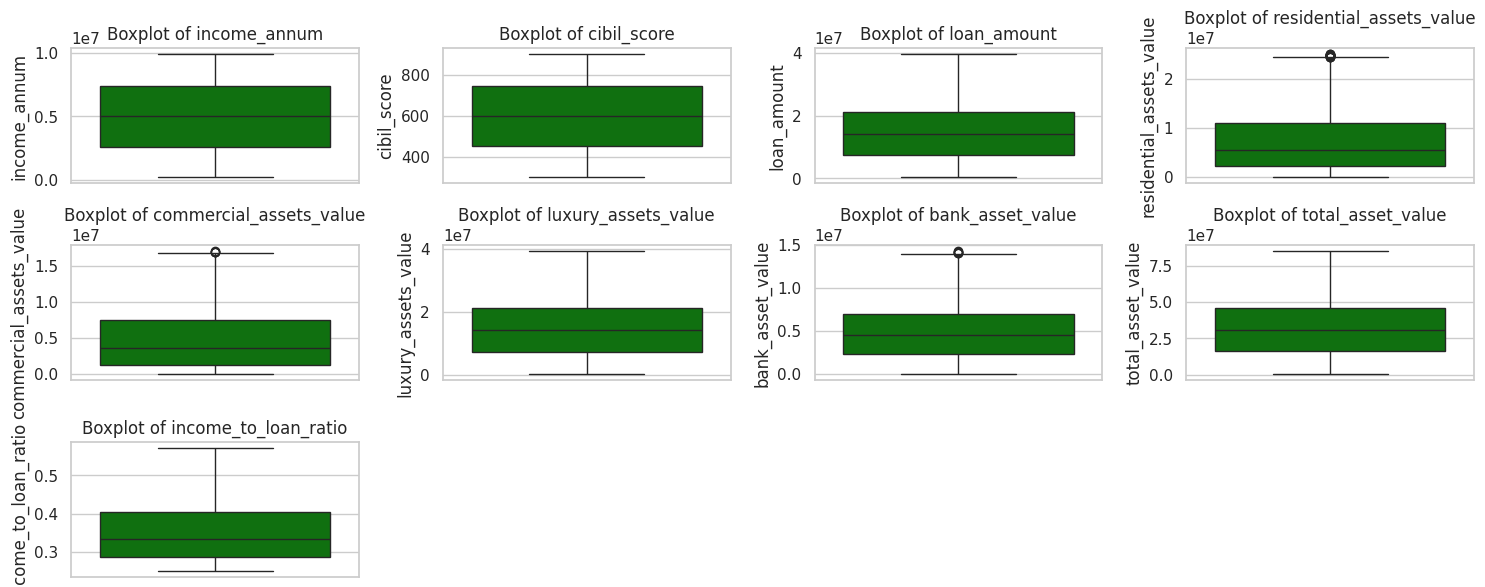

In [96]:
import seaborn as sns
def plot_boxplots(df, columns):
    plt.figure(figsize=(15, 8))
    num_plots = len(columns)  # Calculate the number of plots needed
    num_rows = 4  # Number of rows in the subplot grid
    num_cols = 4  # Number of columns in the subplot grid
    for i, col in enumerate(columns):
        # Calculate the subplot index based on the number of rows and columns
        subplot_index = i + 1
        plt.subplot(num_rows, num_cols, subplot_index)  # Correct usage of subplot
        sns.boxplot(y=df[col], color='green')
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

plot_boxplots(data_cleaned, numerical_cols)

**FEATURE SCALING**

In [97]:
 from sklearn.preprocessing import LabelEncoder, StandardScaler
# #Normalize numerical features
# # Initialize scaler
 scaler = StandardScaler()

# # Identify numerical columns
 numerical_cols = ['income_annum','cibil_score', 'loan_amount','residential_assets_value' ,'commercial_assets_value','luxury_assets_value','bank_asset_value','total_asset_value','income_to_loan_ratio']


# # Apply scaling
 data_cleaned[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])
 data_cleaned.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,income_to_loan_ratio,total_asset_value
1,2,0,1,1,-0.320301,-0.306327,8,-1.064642,-0.735005,-0.626577,-0.682050,-0.501214,1,-0.168068,-0.788769
2,3,3,0,0,1.496881,1.658532,20,-0.547942,-0.017425,-0.079255,2.048891,2.490464,1,-0.577354,1.372991
3,4,3,0,0,1.169788,1.770810,8,-0.774361,1.792832,-0.364814,0.934221,0.947388,1,-1.119462,1.107419
4,5,5,1,1,1.751287,1.041005,20,-1.267838,0.846932,0.801219,1.614169,0.034139,1,0.782340,1.229582
5,6,0,0,1,-0.065895,-0.160366,10,-1.633593,-0.066351,0.825015,-0.135862,0.065630,1,0.100804,0.108866


#Recursive Feature Elimination
**To select important features**

In [98]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define features and target
X = data_cleaned.drop(['loan_id', 'loan_status'], axis=1)
y = data_cleaned['loan_status']

# Recursive Feature Elimination
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=5)
X_selected = rfe.fit_transform(X, y)

# Display selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['loan_amount', 'loan_term', 'cibil_score', 'income_to_loan_ratio',
       'total_asset_value'],
      dtype='object')


#Train Models (Random Forest and XGBoost)

In [99]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# XGBoost Model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

**Ensemble Learning**

***Combine predictions from both models***

In [100]:
import numpy as np

# Predictions
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Ensemble Predictions (Majority Voting)
final_preds = np.where((rf_preds + xgb_preds) >= 1, 1, 0)


**Evaluation Metrics**

In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, final_preds))
print("Precision:", precision_score(y_test, final_preds))
print("Recall:", recall_score(y_test, final_preds))
print("F1 Score:", f1_score(y_test, final_preds))


Accuracy: 0.992797118847539
Precision: 0.98989898989899
Recall: 0.98989898989899
F1 Score: 0.98989898989899



Confusion Matrix:
[[533   3]
 [  3 294]]


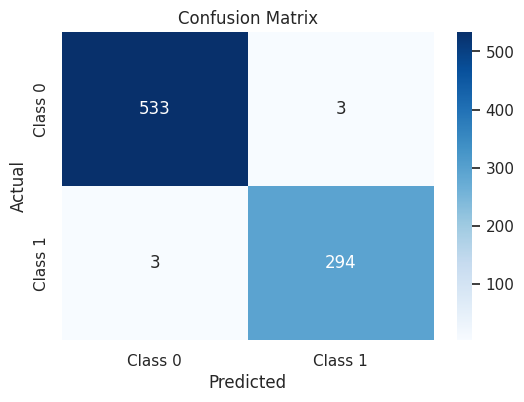

In [102]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, final_preds)

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#Train and Evaluate Random Forest (RF)

In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict using Random Forest
rf_preds = rf_model.predict(X_test)

# Evaluate Random Forest model
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_precision = precision_score(y_test, rf_preds)
rf_recall = recall_score(y_test, rf_preds)
rf_f1_score = f1_score(y_test, rf_preds)

# Display Random Forest evaluation metrics
print("Random Forest Evaluation Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1_score:.4f}")


Random Forest Evaluation Metrics:
Accuracy: 0.9952
Precision: 0.9966
Recall: 0.9899
F1 Score: 0.9932


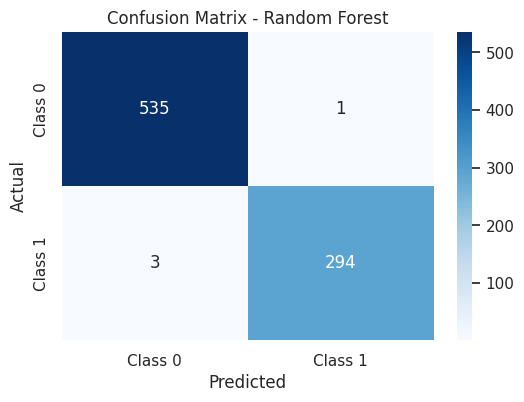

In [104]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_preds)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#Train and Evaluate XGBoost (XGB)

In [105]:
# Train XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict using XGBoost
xgb_preds = xgb_model.predict(X_test)

# Evaluate XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_preds)
xgb_precision = precision_score(y_test, xgb_preds)
xgb_recall = recall_score(y_test, xgb_preds)
xgb_f1_score = f1_score(y_test, xgb_preds)

# Display XGBoost evaluation metrics
print("\nXGBoost Evaluation Metrics:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"F1 Score: {xgb_f1_score:.4f}")



XGBoost Evaluation Metrics:
Accuracy: 0.9928
Precision: 0.9899
Recall: 0.9899
F1 Score: 0.9899


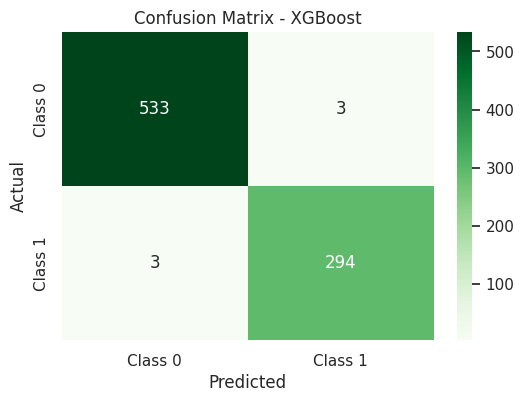

In [106]:
# Generate confusion matrix for XGBoost
xgb_cm = confusion_matrix(y_test, xgb_preds)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [107]:
data_cleaned.shape

(4163, 15)

**Cross-Validation for Generalization**

In [108]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Assuming X_selected and y are already defined and preprocessed
# Ensure X_selected and y are consistent in type
if isinstance(X_selected, np.ndarray):
    X_selected = pd.DataFrame(X_selected)
if isinstance(y, np.ndarray):
    y = pd.Series(y)

# Step 1: Split data for hold-out test set
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 2: Define Models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Step 3: Manual Cross-Validation
def cross_val_metrics(model, X, y, cv, scoring_functions):
    """
    Perform cross-validation manually to compute metrics for each fold.
    Args:
        model: The ML model to train and validate.
        X: Feature data (array or dataframe).
        y: Target data (array or series).
        cv: Cross-validation split object (e.g., StratifiedKFold).
        scoring_functions: Dictionary of scoring metrics to evaluate.

    Returns:
        Dictionary containing mean and standard deviation of each metric across folds.
    """
    # Ensure index consistency for pandas objects
    if hasattr(X, "reset_index"):
        X = X.reset_index(drop=True)
    if hasattr(y, "reset_index"):
        y = y.reset_index(drop=True)

    scores = {metric: [] for metric in scoring_functions}

    for train_idx, test_idx in cv.split(X, y):
        # Proper slicing for pandas or numpy objects
        if hasattr(X, "iloc"):
            X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[test_idx]
            y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[test_idx]
        else:
            X_train_fold, X_val_fold = X[train_idx], X[test_idx]
            y_train_fold, y_val_fold = y[train_idx], y[test_idx]

        # Train and predict
        model.fit(X_train_fold, y_train_fold)
        preds = model.predict(X_val_fold)

        # Calculate metrics
        for metric, func in scoring_functions.items():
            scores[metric].append(func(y_val_fold, preds))

    return {metric: (np.mean(scores[metric]), np.std(scores[metric])) for metric in scores}

# Define Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring_functions = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'f1': f1_score
}

# Evaluate Random Forest
print("\n=== Random Forest Cross-Validation ===")
rf_cv_scores = cross_val_metrics(rf_model, X_train, y_train, skf, scoring_functions)
for metric, (mean_score, std_score) in rf_cv_scores.items():
    print(f"{metric.capitalize()} (CV Mean): {mean_score:.4f} | Std: {std_score:.4f}")

# Evaluate XGBoost
print("\n=== XGBoost Cross-Validation ===")
xgb_cv_scores = cross_val_metrics(xgb_model, X_train, y_train, skf, scoring_functions)
for metric, (mean_score, std_score) in xgb_cv_scores.items():
    print(f"{metric.capitalize()} (CV Mean): {mean_score:.4f} | Std: {std_score:.4f}")

# Step 4: Train Models on Full Training Data
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Step 5: Evaluate on Hold-Out Test Set
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Ensemble Majority Voting
final_preds = np.where((rf_preds + xgb_preds) >= 1, 1, 0)

# Calculate Metrics for Hold-Out Test Set
print("\n=== Hold-Out Test Set Evaluation (Ensemble) ===")
print(f"Accuracy: {accuracy_score(y_test, final_preds):.4f}")
print(f"Precision: {precision_score(y_test, final_preds):.4f}")
print(f"Recall: {recall_score(y_test, final_preds):.4f}")
print(f"F1 Score: {f1_score(y_test, final_preds):.4f}")



=== Random Forest Cross-Validation ===
Accuracy (CV Mean): 0.9955 | Std: 0.0019
Precision (CV Mean): 0.9992 | Std: 0.0016
Recall (CV Mean): 0.9890 | Std: 0.0052
F1 (CV Mean): 0.9940 | Std: 0.0025

=== XGBoost Cross-Validation ===
Accuracy (CV Mean): 0.9946 | Std: 0.0020
Precision (CV Mean): 0.9968 | Std: 0.0030
Recall (CV Mean): 0.9890 | Std: 0.0052
F1 (CV Mean): 0.9929 | Std: 0.0027

=== Hold-Out Test Set Evaluation (Ensemble) ===
Accuracy: 0.9928
Precision: 0.9899
Recall: 0.9899
F1 Score: 0.9899


#Other Models

In [109]:
# pip install catboost

In [110]:
# pip install --upgrade scikit-learn


In [111]:
# !pip show scikit-learn


In [112]:
# !pip uninstall scikit-learn

In [113]:
 pip install scikit-learn==1.0.2

In [114]:
# pip install --upgrade scikit-learn xgboost
#

In [115]:
pip install catboost

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from tabulate import tabulate
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "SVC": SVC(probability=True, random_state=42),  # Enabling probabilities for scoring compatibility
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Define evaluation function
def evaluate_model_with_confusion_matrix(model, X_train, y_train, X_test, y_test):
    """
    Train the model and evaluate on the test set.
    Returns a dictionary with evaluation metrics and the confusion matrix.
    """
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, preds)
    return {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds, zero_division=0),
        "Recall": recall_score(y_test, preds, zero_division=0),
        "F1 Score": f1_score(y_test, preds, zero_division=0),
        "Confusion Matrix": conf_matrix
    }

# Assume X_selected and y are predefined
# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 2: Evaluate each model
results = {}

for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    try:
        metrics = evaluate_model_with_confusion_matrix(model, X_train, y_train, X_test, y_test)
        results[model_name] = metrics
    except Exception as e:
        print(f"Error occurred while training {model_name}: {e}")

# Step 3: Create a results DataFrame
# Extract confusion matrices separately for display in the table
conf_matrices = {model_name: metrics.pop("Confusion Matrix") for model_name, metrics in results.items()}
results_df = pd.DataFrame(results).T

# Add confusion matrices back as a new column
results_df["Confusion Matrix"] = [conf_matrices[model_name] for model_name in results_df.index]

# Step 4: Sort by F1 Score
results_df = results_df.sort_values(by="F1 Score", ascending=False)

# Display the results
print(tabulate(results_df, headers="keys", tablefmt="pretty"))


Training and evaluating Logistic Regression...
Training and evaluating Decision Tree...
Training and evaluating CatBoost...
Training and evaluating LightGBM...
[LightGBM] [Info] Number of positive: 1268, number of negative: 2062
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1029
[LightGBM] [Info] Number of data points in the train set: 3330, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.380781 -> initscore=-0.486236
[LightGBM] [Info] Start training from score -0.486236
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

In [117]:
# !pip install scikit-learn==1.0.2 --upgrade
# !pip install --upgrade xgboost lightgbm catboost

#Alternative methodology

**DATA AUGMENTATION USING SMOTE**

In [118]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = data.drop(['loan_id', 'loan_status'], axis=1)  # Exclude target and non-predictive columns
y = data['loan_status']

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to generate synthetic data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled data back into a DataFrame
augmented_data_smote = pd.DataFrame(X_resampled, columns=X.columns)
augmented_data_smote['loan_status'] = y_resampled

# Check the new dataset size
print(f"New dataset size after SMOTE: {augmented_data_smote.shape}")


New dataset size after SMOTE: (5312, 14)


In [119]:
print(f"Number of columns in X: {len(X.columns)}")
print(f"Number of columns in augmented_data_smote: {len(augmented_data_smote.columns)}")


Number of columns in X: 13
Number of columns in augmented_data_smote: 14


In [120]:
print(X.columns)

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'income_to_loan_ratio', 'total_asset_value'],
      dtype='object')


In [121]:
print(f"Selected columns: {X_selected.columns}")


Selected columns: RangeIndex(start=0, stop=5, step=1)


**RANDOM SAMPLING (Over-sampling)**

In [122]:
# Function to create a larger dataset by random sampling
def increase_dataset_size(features, labels, target_size=12000):
    # Calculate how many times to duplicate the data
    num_duplicates = (target_size // features.shape[0]) + 1

    # Duplicate features and labels
    augmented_features = pd.concat([features] * num_duplicates, ignore_index=True)
    augmented_labels = pd.concat([labels] * num_duplicates, ignore_index=True)

    # Truncate to the target size
    augmented_features = augmented_features.iloc[:target_size, :]
    augmented_labels = augmented_labels.iloc[:target_size]

    return augmented_features, augmented_labels

# Increase dataset size to ~12,000
X_selected, y = increase_dataset_size(augmented_data_smote, y, target_size=12000)

# Check the size of the augmented dataset
print(f"New feature size: {X_selected.shape[0]}")
print(f"New label size: {y.shape[0]}")


New feature size: 12000
New label size: 12000


In [123]:
print(f"New feature size (rows, columns): {X_selected.shape}")

New feature size (rows, columns): (12000, 14)


**DATASET SIZE AFTER AUGMENTATION**

In [124]:
X_selected.shape

(12000, 14)

In [125]:
pip install pytorch-tabnet scikit-learn

**HYBRID MODEL (TABNET+RF)**

In [126]:
# Import libraries
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, train_test_split
import numpy as np
import joblib  # For saving and loading models

# Step 1: Prepare the augmented dataset (12,000 instances)
# Assuming the augmented dataset is stored in data_combined
# Update X and y with the augmented data
X = X_selected.drop(['loan_status'], axis=1)  # Drop non-predictive columns
y = X_selected['loan_status']  # Target variable

# Step 2: Create the train-test split (80% train, 20% test)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: TabNet Configuration
tabnet = TabNetClassifier(
    seed=42,
    verbose=1,
    lambda_sparse=1e-4,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2)
)

# Create Stratified K-Fold cross-validation (5 folds)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# TabNet Training and Evaluation
best_epoch = 0
best_test_accuracy = 0
best_rf_model = None

# Training Loop for Stratified K-Fold
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_full, y_train_full)):
    print(f"\n=== Fold {fold + 1} ===")

    # Split data into training and validation sets for this fold
    X_resampled, X_val = X_train_full.iloc[train_idx], X_train_full.iloc[val_idx]
    y_resampled, y_val = y_train_full.iloc[train_idx], y_train_full.iloc[val_idx]

    # Train TabNet
    tabnet.fit(
        X_resampled.values, y_resampled.values,  # Convert to NumPy arrays
        eval_set=[(X_resampled.values, y_resampled.values), (X_val.values, y_val.values)],  # Convert to NumPy arrays
        eval_name=['train', 'val'],
        eval_metric=['accuracy'],
        max_epochs=100,
        patience=10,
        batch_size=256
    )

    # Extract TabNet feature embeddings
    train_embeddings = tabnet.predict_proba(X_resampled.values)
    val_embeddings = tabnet.predict_proba(X_val.values)
    test_embeddings = tabnet.predict_proba(X_test.values)  # Ensure X_test is defined

    # Train Random Forest on TabNet embeddings
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(train_embeddings, y_resampled)

    # Evaluate on validation set (within this fold)
    y_val_pred = rf.predict(val_embeddings)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy (Fold {fold + 1}): {val_accuracy}")

    # Evaluate on holdout test set (X_test)
    y_test_pred = rf.predict(test_embeddings)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy (Fold {fold + 1}): {test_accuracy}")

    # Save the best model and its test accuracy
    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy
        best_epoch = fold + 1
        best_rf_model = rf
        joblib.dump(rf, "best_rf_model.pkl")  # Save the RF model
        tabnet.save_model("best_tabnet_model")  # Save the TabNet model

# Summary of the best model
print(f"\nBest Test Accuracy: {best_test_accuracy} at Fold {best_epoch}")

# Step 4: Validate Saved Model Reproduction
print("\n=== Validation of Saved Model ===")
# Load saved models
loaded_tabnet = TabNetClassifier()
loaded_tabnet.load_model("best_tabnet_model.zip")
loaded_rf = joblib.load("best_rf_model.pkl")

# Generate embeddings using the saved TabNet model
saved_test_embeddings = loaded_tabnet.predict_proba(X_test.values)

# Evaluate Random Forest on saved embeddings
saved_test_pred = loaded_rf.predict(saved_test_embeddings)
saved_test_accuracy = accuracy_score(y_test, saved_test_pred)
print(f"Reproduced Test Accuracy: {saved_test_accuracy}")

# Ensure reproducibility
assert np.isclose(best_test_accuracy, saved_test_accuracy), "Mismatch in reproduced accuracy!"
print("Reproduced accuracy matches the best recorded accuracy.")



=== Fold 1 ===
epoch 0  | loss: 0.44582 | train_accuracy: 0.51836 | val_accuracy: 0.51927 |  0:00:02s
epoch 1  | loss: 0.21451 | train_accuracy: 0.57018 | val_accuracy: 0.575   |  0:00:05s
epoch 2  | loss: 0.17169 | train_accuracy: 0.54857 | val_accuracy: 0.55    |  0:00:08s
epoch 3  | loss: 0.14623 | train_accuracy: 0.66302 | val_accuracy: 0.6776  |  0:00:13s
epoch 4  | loss: 0.1162  | train_accuracy: 0.75078 | val_accuracy: 0.75521 |  0:00:17s
epoch 5  | loss: 0.09707 | train_accuracy: 0.81055 | val_accuracy: 0.81354 |  0:00:22s
epoch 6  | loss: 0.07875 | train_accuracy: 0.85469 | val_accuracy: 0.86354 |  0:00:29s
epoch 7  | loss: 0.07125 | train_accuracy: 0.88867 | val_accuracy: 0.8901  |  0:00:33s
epoch 8  | loss: 0.07807 | train_accuracy: 0.9181  | val_accuracy: 0.91823 |  0:00:36s
epoch 9  | loss: 0.07223 | train_accuracy: 0.93021 | val_accuracy: 0.93646 |  0:00:42s
epoch 10 | loss: 0.07047 | train_accuracy: 0.94688 | val_accuracy: 0.9474  |  0:00:46s
epoch 11 | loss: 0.07637 | 

**VISUALIZATION GRAPHS FOR TRAINING LOSS, VALIDATION & TEST ACCURACIES**

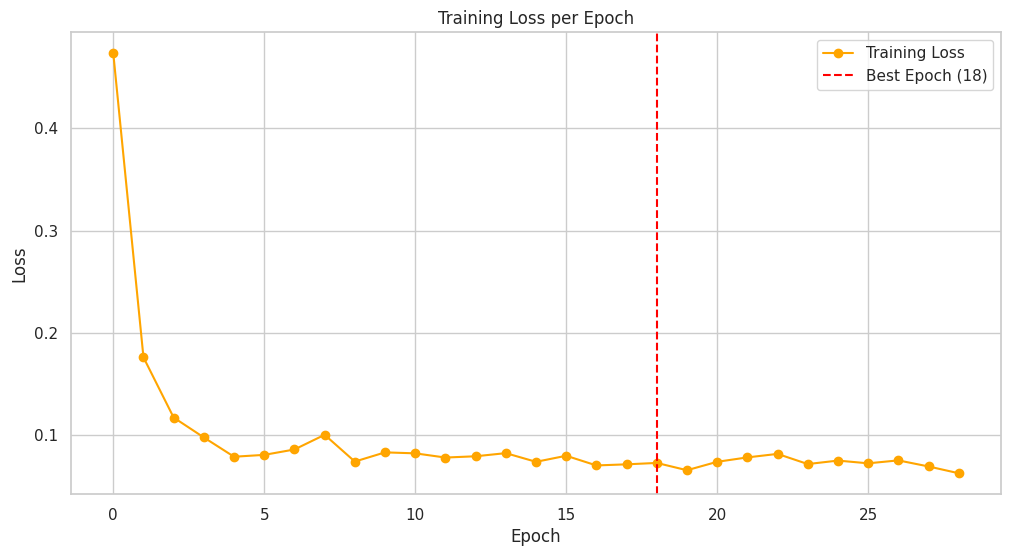

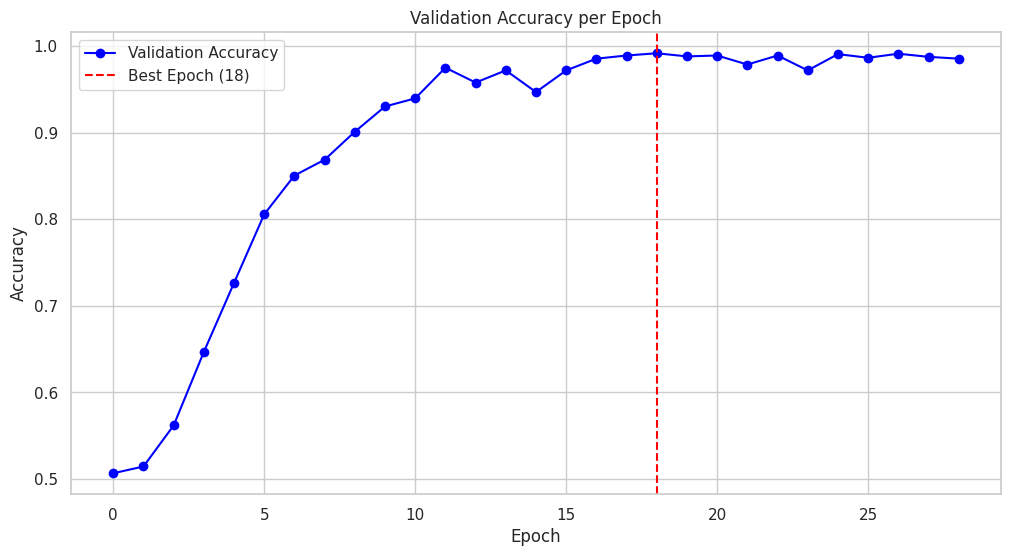

Best Validation Accuracy: 0.9917 at Epoch 18
Test Accuracy: 0.9900


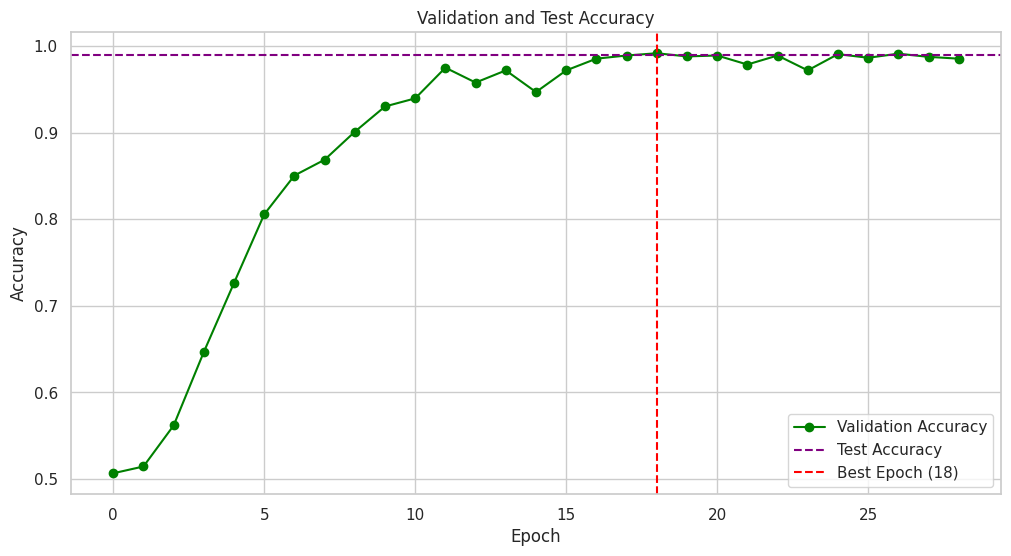

In [127]:
import matplotlib.pyplot as plt
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Ensure `X_test` is a NumPy array (TabNet does not accept Pandas DataFrame)
X_test_np = X_test.values  # Convert from DataFrame to NumPy array

# Ensure `history` exists
try:
    history = tabnet.history  # Retrieve training history
    epochs = len(history['loss'])  # Total number of epochs
except AttributeError:
    raise ValueError("`tabnet.history` is not available. Ensure training metrics were logged.")

# Extract training loss and validation accuracy
train_losses = history['loss']
val_accuracies = history['val_accuracy']

# Identify the best epoch based on validation accuracy
best_epoch = np.argmax(val_accuracies)
best_val_accuracy = val_accuracies[best_epoch]

# Plot Training Loss
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), train_losses, label="Training Loss", marker='o', color='orange')
plt.axvline(best_epoch, color='red', linestyle='--', label=f"Best Epoch ({best_epoch})")
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Plot Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), val_accuracies, label="Validation Accuracy", marker='o', color='blue')
plt.axvline(best_epoch, color='red', linestyle='--', label=f"Best Epoch ({best_epoch})")
plt.title("Validation Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Test the model on the test set
test_preds = tabnet.predict(X_test_np)  # Use NumPy array
test_accuracy = accuracy_score(y_test, test_preds)

# Print Best Validation Accuracy and Test Accuracy
print(f"Best Validation Accuracy: {best_val_accuracy:.4f} at Epoch {best_epoch}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot Validation and Test Accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), val_accuracies, label="Validation Accuracy", marker='o', color='green')
plt.axhline(test_accuracy, color='purple', linestyle='--', label="Test Accuracy")
plt.axvline(best_epoch, color='red', linestyle='--', label=f"Best Epoch ({best_epoch})")
plt.title("Validation and Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


Confusion Matrix:
[[1228    4]
 [   6 1162]]


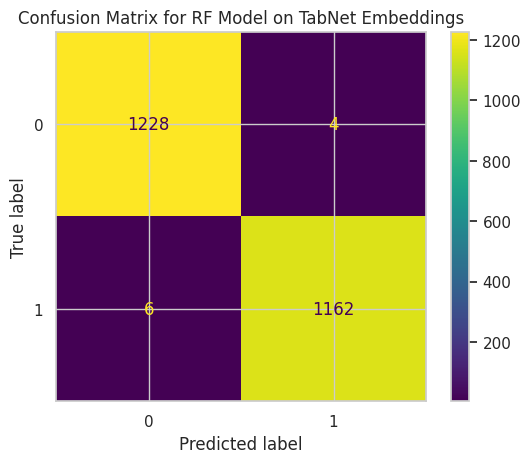

In [128]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, saved_test_pred)

# Print the confusion matrix as raw numbers
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=loaded_rf.classes_)
disp.plot(cmap="viridis")
plt.title("Confusion Matrix for RF Model on TabNet Embeddings")
plt.show()


**FEATURE LEVEL IMPORTANCE**

TabNet Feature Importances:
no_of_dependents: 0.0091
education: 0.0844
self_employed: 0.0076
income_annum: 0.0261
loan_amount: 0.0089
loan_term: 0.1545
cibil_score: 0.4950
residential_assets_value: 0.0311
commercial_assets_value: 0.0870
luxury_assets_value: 0.0294
bank_asset_value: 0.0061
income_to_loan_ratio: 0.0352
total_asset_value: 0.0257


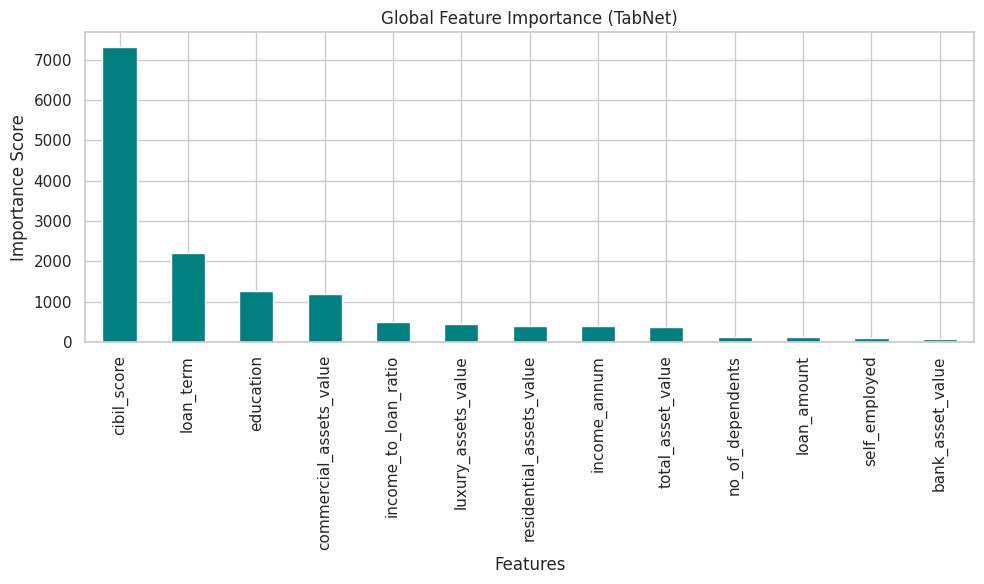

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate explanations for the test dataset using TabNet
explanations = tabnet.explain(X_test.values)

# Print feature importances from TabNet
print("TabNet Feature Importances:")
feature_importance_tabnet = tabnet.feature_importances_
for name, importance in zip(X.columns, feature_importance_tabnet):
    print(f"{name}: {importance:.4f}")

# Step 1: Extract the feature importance array from the explanations tuple
# Shape: (number of samples in X_test, number of features)
feature_importance_array = explanations[0]

# Step 2: Aggregate feature importances across all samples
# Summing across rows to get global feature importance
global_feature_importance = np.sum(feature_importance_array, axis=0)

# Step 3: Map aggregated feature importances to feature names
feature_names = X.columns  # Ensure this matches the original feature names
feature_importance_series = pd.Series(global_feature_importance, index=feature_names)

# Step 4: Sort feature importances for visualization
feature_importance_sorted = feature_importance_series.sort_values(ascending=False)

# Step 5: Plot global feature importance
plt.figure(figsize=(10, 6))
feature_importance_sorted.plot(kind='bar', color='teal', title="Global Feature Importance (TabNet)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


**INSTANCE LEVEL EXPLAINATION**

In [130]:
sample_index = 0  # Index of the instance you want to explain
instance_importance = np.sum(explanations[sample_index], axis=0)  # Aggregate across steps

# Map feature importance to feature names
instance_importance = pd.Series(instance_importance, index=feature_names)
instance_importance = instance_importance.sort_values(ascending=False)
print(instance_importance)

cibil_score                 7308.516744
loan_term                   2199.373895
education                   1256.866018
commercial_assets_value     1194.060312
income_to_loan_ratio         484.140075
luxury_assets_value          448.979754
residential_assets_value     400.987824
income_annum                 396.705618
total_asset_value            370.979090
no_of_dependents             131.679702
loan_amount                  126.613204
self_employed                100.671783
bank_asset_value              82.251579
dtype: float64


**TABNET MODEL (STANDALONE)**

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib  # For saving and loading the model

# Step 1: Preprocessing and Dataset Preparation
X = X_selected.drop(['loan_status'], axis=1)  # Features
y = X_selected['loan_status']  # Target

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Define TabNet Classifier
tabnet = TabNetClassifier(
    seed=42,
    verbose=1,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    lambda_sparse=1e-4
)

# Step 3: Train TabNet
tabnet.fit(
    X_train.values, y_train.values,  # Convert to NumPy arrays
    eval_set=[(X_train.values, y_train.values), (X_test.values, y_test.values)],
    eval_name=['train', 'test'],
    eval_metric=['accuracy'],
    max_epochs=100,
    patience=10,
    batch_size=256,
    virtual_batch_size=128
)

# Save the best model based on validation accuracy
tabnet.save_model("best_tabnet_model")

# Step 4: Evaluate TabNet
# Predict on test data
y_pred = tabnet.predict(X_test.values)

# Calculate evaluation metrics
test_accuracy = accuracy_score(y_test, y_pred)
print("\n=== Evaluation Metrics ===")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



epoch 0  | loss: 0.42138 | train_accuracy: 0.49427 | test_accuracy: 0.49708 |  0:00:03s
epoch 1  | loss: 0.19028 | train_accuracy: 0.51177 | test_accuracy: 0.51083 |  0:00:08s
epoch 2  | loss: 0.1337  | train_accuracy: 0.60479 | test_accuracy: 0.6     |  0:00:14s
epoch 3  | loss: 0.12888 | train_accuracy: 0.73552 | test_accuracy: 0.73458 |  0:00:18s
epoch 4  | loss: 0.09601 | train_accuracy: 0.82375 | test_accuracy: 0.83333 |  0:00:25s
epoch 5  | loss: 0.09346 | train_accuracy: 0.86812 | test_accuracy: 0.87083 |  0:00:30s
epoch 6  | loss: 0.08571 | train_accuracy: 0.88792 | test_accuracy: 0.89042 |  0:00:34s
epoch 7  | loss: 0.08817 | train_accuracy: 0.92677 | test_accuracy: 0.93125 |  0:00:40s
epoch 8  | loss: 0.0861  | train_accuracy: 0.94365 | test_accuracy: 0.95042 |  0:00:44s
epoch 9  | loss: 0.07442 | train_accuracy: 0.96271 | test_accuracy: 0.965   |  0:00:46s
epoch 10 | loss: 0.08511 | train_accuracy: 0.98938 | test_accuracy: 0.99167 |  0:00:48s
epoch 11 | loss: 0.08473 | train

In [132]:
# Final Summary
print(f"\nBest Validation Accuracy: {val_accuracies[best_epoch]:.4f} at best Epoch")

# Step : Verify Saved Model
# Load saved model
loaded_tabnet = TabNetClassifier()
loaded_tabnet.load_model("best_tabnet_model.zip")

# Reproduce test results
reproduced_preds = loaded_tabnet.predict(X_test.values)
reproduced_accuracy = accuracy_score(y_test, reproduced_preds)

# Verify results match
print("\n=== Reproduced Results ===")
print(f"Reproduced Test Accuracy: {reproduced_accuracy:.4f}")
assert np.isclose(test_accuracy, reproduced_accuracy), "Mismatch in reproduced accuracy!"
print("Reproduced accuracy matches the originally recorded test accuracy.")


Best Validation Accuracy: 0.9917 at best Epoch

=== Reproduced Results ===
Reproduced Test Accuracy: 0.9921
Reproduced accuracy matches the originally recorded test accuracy.


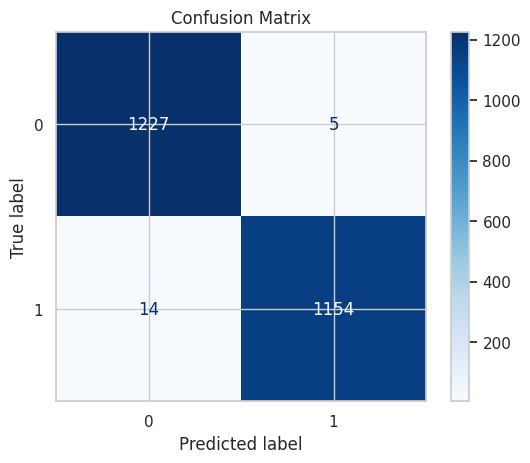

In [133]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=tabnet.classes_)
disp.plot(cmap=plt.cm.Blues)

# Add title and show the plot
plt.title("Confusion Matrix")
plt.show()


#MODEL INBUILT INTERPRETABILITY


=== TabNet Feature Importances ===
no_of_dependents: 0.0318
education: 0.0105
self_employed: 0.0000
income_annum: 0.0212
loan_amount: 0.0233
loan_term: 0.2018
cibil_score: 0.4972
residential_assets_value: 0.1175
commercial_assets_value: 0.0540
luxury_assets_value: 0.0103
bank_asset_value: 0.0316
income_to_loan_ratio: 0.0004
total_asset_value: 0.0001


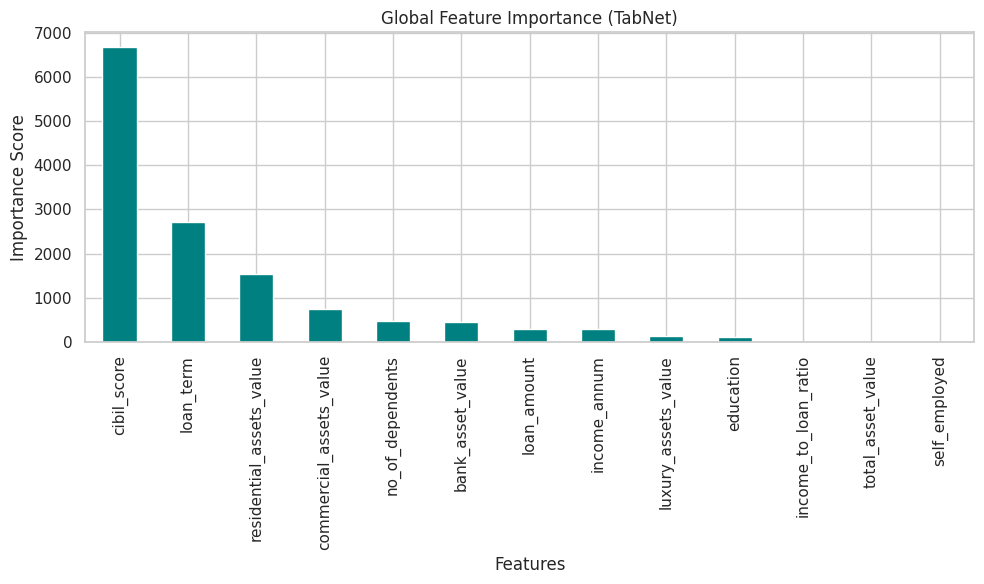

In [134]:
# Step 5: Feature Importance Analysis
# Generate explanations for the test dataset
explanations = tabnet.explain(X_test.values)

# Print global feature importance
print("\n=== TabNet Feature Importances ===")
feature_importance_tabnet = tabnet.feature_importances_
for name, importance in zip(X.columns, feature_importance_tabnet):
    print(f"{name}: {importance:.4f}")

# Step 6: Visualize Global Feature Importance
# Aggregate feature importances from explanations
global_feature_importance = np.sum(explanations[0], axis=0)  # Sum across all test samples
feature_importance_series = pd.Series(global_feature_importance, index=X.columns)

# Sort and plot
feature_importance_sorted = feature_importance_series.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance_sorted.plot(kind='bar', color='teal', title="Global Feature Importance (TabNet)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()



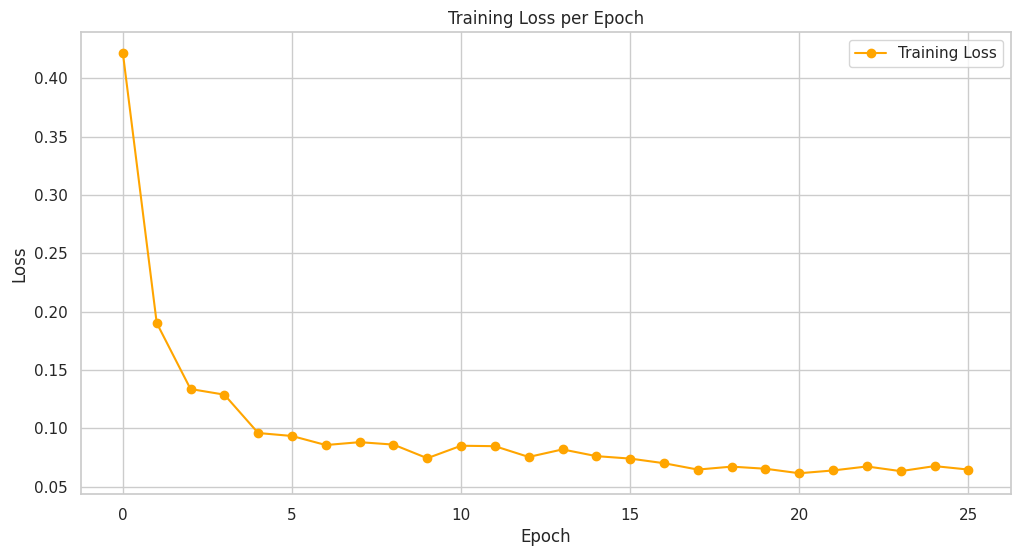

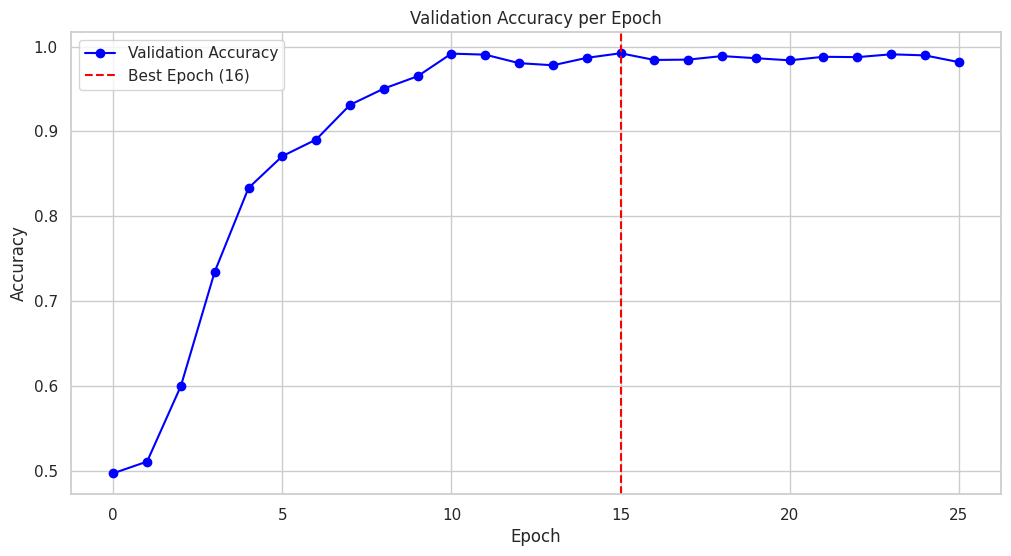

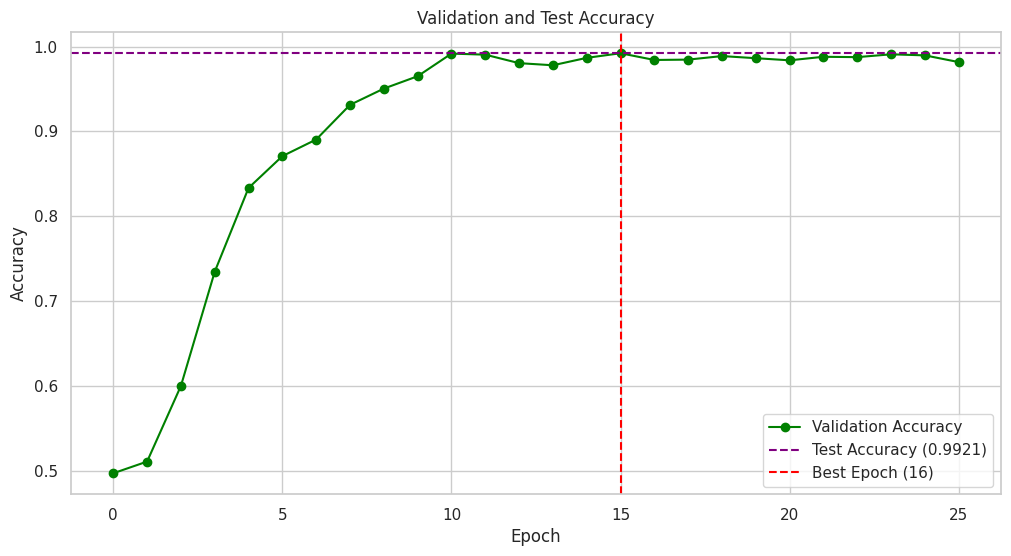

In [135]:

# Step 6: Visualize Training and Validation Metrics
history = tabnet.history
epochs = len(history['loss'])
val_accuracies = history['test_accuracy']
best_epoch = np.argmax(val_accuracies)

# Plot Training Loss
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), history['loss'], label="Training Loss", marker='o', color='orange')
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Plot Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), val_accuracies, label="Validation Accuracy", marker='o', color='blue')
plt.axvline(best_epoch, color='red', linestyle='--', label=f"Best Epoch ({best_epoch + 1})")
plt.title("Validation Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plot Test Accuracy (alongside Validation Accuracy)
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), val_accuracies, label="Validation Accuracy", marker='o', color='green')
plt.axhline(test_accuracy, color='purple', linestyle='--', label=f"Test Accuracy ({test_accuracy:.4f})")
plt.axvline(best_epoch, color='red', linestyle='--', label=f"Best Epoch ({best_epoch + 1})")
plt.title("Validation and Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


#SHAP Post-hoc Model INTERPRETABILITY

In [136]:
# pip install shap

In [137]:
print(f"X_test shape: {X_test[:100].shape}")
print(f"Number of feature names: {len(feature_names)}")

X_test shape: (100, 13)
Number of feature names: 13


In [138]:
X_selected=X_selected.drop(['loan_status'], axis=1)
print(f"Shape of X_selected: {X_selected.shape}")
print(f"Shape of y: {y.shape}")


Shape of X_selected: (12000, 13)
Shape of y: (12000,)


In [139]:
print(type(X_test))
print(X_test.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'income_to_loan_ratio', 'total_asset_value'],
      dtype='object')


In [140]:
# pip install --upgrade shap


In [141]:
# !pip install scikit-learn>=1.2.0 --upgrade
# !pip install shap --upgrade

In [142]:

# pip install scikit-learn shap pytorch-tabnet


In [143]:
# pip install --upgrade pip


In [144]:
# !pip show shap


In [145]:
# !pip show scikit-learn shap


In [146]:
# pip uninstall scikit-learn


In [147]:
# pip install scikit-learn==1.0.2


In [148]:
# !pip uninstall shap


In [149]:
pip install shap

In [150]:
# pip install scikit-learn==1.0.2 shap==0.41.0


In [151]:
import shap
print("SHAP version:", shap.__version__)


SHAP version: 0.46.0


epoch 0  | loss: 0.4227  |  0:00:01s
epoch 1  | loss: 0.16626 |  0:00:04s
epoch 2  | loss: 0.10567 |  0:00:08s
epoch 3  | loss: 0.09298 |  0:00:11s
epoch 4  | loss: 0.08676 |  0:00:13s
epoch 5  | loss: 0.08745 |  0:00:16s
epoch 6  | loss: 0.08032 |  0:00:21s
epoch 7  | loss: 0.08806 |  0:00:24s
epoch 8  | loss: 0.06899 |  0:00:28s
epoch 9  | loss: 0.07435 |  0:00:30s
epoch 10 | loss: 0.07403 |  0:00:35s
epoch 11 | loss: 0.07021 |  0:00:38s
epoch 12 | loss: 0.06581 |  0:00:41s
epoch 13 | loss: 0.07778 |  0:00:44s
epoch 14 | loss: 0.06726 |  0:00:47s
epoch 15 | loss: 0.07885 |  0:00:49s
epoch 16 | loss: 0.07755 |  0:00:51s
epoch 17 | loss: 0.07985 |  0:00:52s
epoch 18 | loss: 0.08223 |  0:00:53s
epoch 19 | loss: 0.06891 |  0:00:54s
epoch 20 | loss: 0.07648 |  0:00:56s
epoch 21 | loss: 0.07044 |  0:00:57s
epoch 22 | loss: 0.07377 |  0:00:58s
epoch 23 | loss: 0.07306 |  0:00:59s
epoch 24 | loss: 0.06145 |  0:01:01s
epoch 25 | loss: 0.06823 |  0:01:03s
epoch 26 | loss: 0.06606 |  0:01:04s
e

PermutationExplainer explainer: 101it [04:59,  3.09s/it]


Shape of SHAP values for class 1: (100, 13)
Shape of X_test_array: (100, 13)


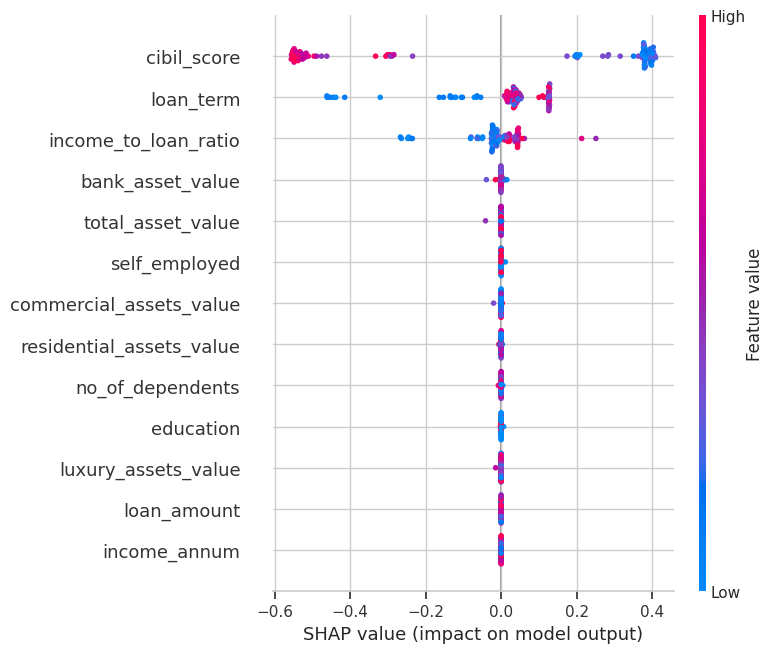

In [152]:
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from pytorch_tabnet.tab_model import TabNetClassifier

# Assuming you already have X_selected and y prepared
if isinstance(X_selected, np.ndarray):
    X_selected = pd.DataFrame(X_selected)
if isinstance(y, np.ndarray):
    y = pd.Series(y)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize and fit the TabNet model
tabnet = TabNetClassifier()
tabnet.fit(X_train.to_numpy(), y_train.to_numpy(), max_epochs=50, patience=10, batch_size=256)

# Feature names
feature_names = [
    'no_of_dependents', 'education', 'self_employed', 'income_annum',
    'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
    'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
    'income_to_loan_ratio', 'total_asset_value'
]

# Ensure feature names match
assert len(feature_names) == X_train.shape[1], "Feature names and feature count mismatch!"

# Convert test data to numpy array for SHAP
X_test_array = X_test.to_numpy()

# SHAP DeepExplainer (works better for TabNet)
tabnet_explainer = shap.Explainer(tabnet.predict_proba, X_train.to_numpy())

# Compute SHAP values for the test set
shap_values_tabnet = tabnet_explainer(X_test_array[:100])

# Extract SHAP values for the first class (binary classification)
shap_values_class = shap_values_tabnet[:, :, 1].values  # Extract SHAP values for class 1
print(f"Shape of SHAP values for class 1: {shap_values_class.shape}")
print(f"Shape of X_test_array: {X_test_array[:100].shape}")

# Verify dimensions match for plotting
assert shap_values_class.shape == X_test_array[:100].shape, "Mismatch between SHAP values and test data!"

# Summary plot for SHAP values
shap.summary_plot(
    shap_values_class,  # SHAP values for the chosen class
    X_test_array[:100],
    feature_names=feature_names
)




Explanation for test instance 1:


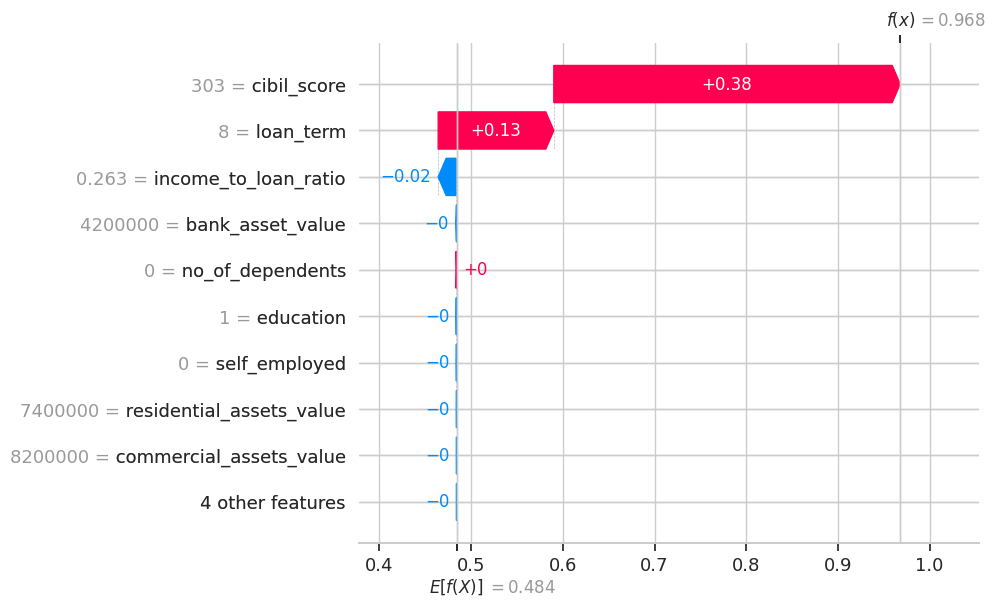

Explanation for test instance 2:


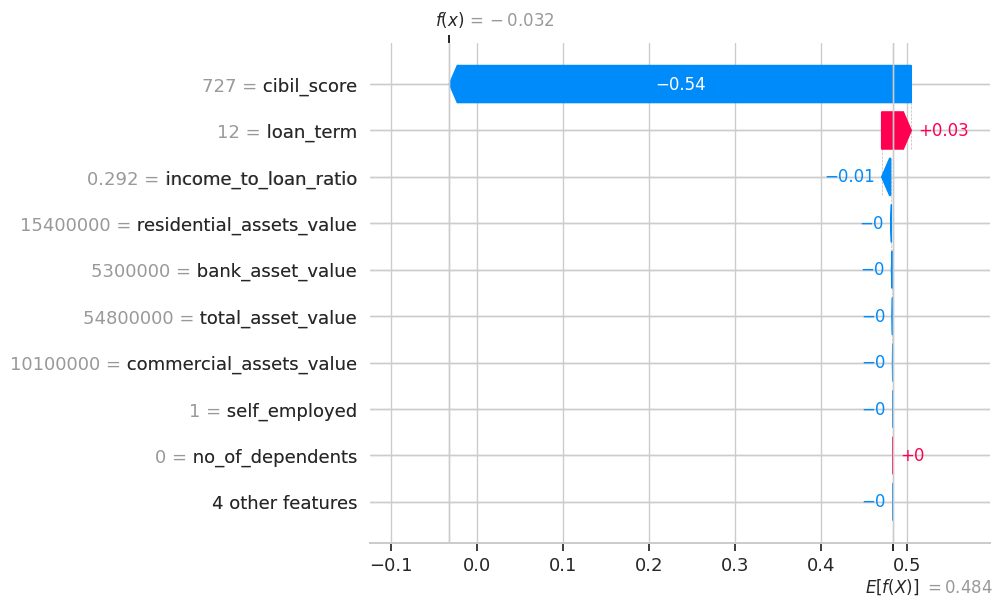

Explanation for test instance 3:


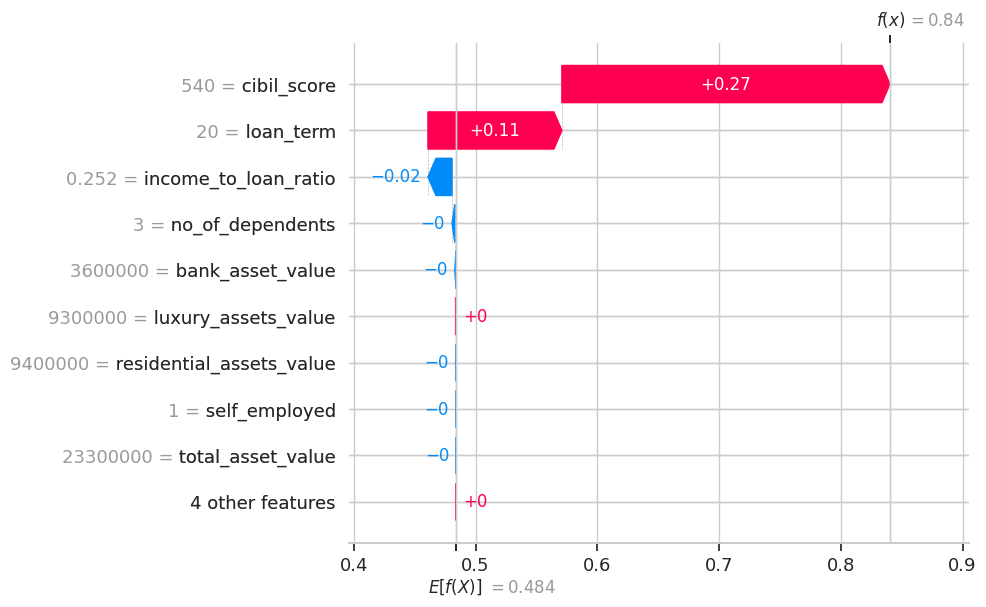

In [158]:
# To Set the class index (e.g., for binary classification, 0 or 1)
class_index = 1  # Change this based on the class you want to explain

# Extract the base value for the target class
base_value_for_class = (
    shap_values_tabnet.base_values[class_index][0]
    if hasattr(shap_values_tabnet.base_values[class_index], "__len__")
    else shap_values_tabnet.base_values[class_index]
)

# Individual prediction explanations
for i in range(min(3, len(X_test_array))):  # Loop through up to 3 instances or fewer
    print(f"Explanation for test instance {i + 1}:")
    shap.waterfall_plot(
        shap.Explanation(
            values=shap_values_class[i],  # SHAP values for this instance
            base_values=base_value_for_class,  # Scalar base value for the target class
            data=X_test_array[i],  # Feature values for this instance
            feature_names=feature_names  # Feature names
        )
    )


In [159]:
print("Features in SHAP values:", feature_names)  # Replace with your SHAP feature names
print("Features in X_test_array:", X_test.columns.tolist())


Features in SHAP values: ['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'income_to_loan_ratio', 'total_asset_value']
Features in X_test_array: ['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'income_to_loan_ratio', 'total_asset_value']


In [160]:
print(f"Shape of SHAP values: {np.array(shap_values_tabnet).shape}")
print(f"Shape of X_test_array: {X_test_array.shape}")


Shape of SHAP values: (100, 13, 2)
Shape of X_test_array: (2400, 13)
